# 목차
- Gradient Boosting Regression/Classifier Tree
- Ensemble Method
    - voting
    - bagging
    - xgboost
- support vector machine
    - SVC
        - iris, cancer
    - LinearSVC
        - iris, cancer
- MLP(Multilayer Perceptron)
    - cancer data
    

# 고찰 및 특이사항
- Gradient Boosting Regression/Classifier Tree
    - cancer data에 대해서, 파라미터 조절 했을 때, 결과 값에 큰 차이가 없음(데이터 양이 조금밖에 없어서 그런 것 같음)
    - gradient boosting에서는, 일부 특성을 무시하고 있다.

- Ensemble Method
    - 개별적인 classifier를 단독으로 사용할 때 보다, 앙상블 기법을 이용하여, test한 결과가 가장 accuracy가 높음을 확인 했습니다.
- support vector machine
    - y = y % 2 <---- 더미, 클래스 레이블을 만드는 트릭
    - linearsvc, svc모두 높은 정확도를 보이고 있으나, svc가 조금 더 높은 정확도를 보인다.
- MLP


In [1]:
#라이브러리 import
from sklearn.datasets import make_blobs
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from preamble import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
#맥에서 폰트문제 해결하기
from matplotlib import rc
rc('font', family="AppleGothic")

In [3]:
#Cancer data GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score


In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state =0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [5]:
cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=10)
print("테스트 세트 정확도 CV = 10 {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print("테스트 세트 정확도 CV = 5 {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도 CV = 10 0.960

테스트 세트 정확도 CV = 5 0.963



In [6]:
# 트리 깊이를 1로 조정

In [7]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state =0)

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=10)
print("테스트 세트 정확도 CV = 10 {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print("테스트 세트 정확도 CV = 5 {:.3f}\n".format(cvscores.mean()))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV = 10 0.961

테스트 세트 정확도 CV = 5 0.965



In [8]:
# 학습률을 낮춤(learning_rate = 0.01
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state =0)

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=10)
print("테스트 세트 정확도 CV = 10 {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print("테스트 세트 정확도 CV = 5 {:.3f}\n".format(cvscores.mean()))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965
테스트 세트 정확도 CV = 10 0.946

테스트 세트 정확도 CV = 5 0.944



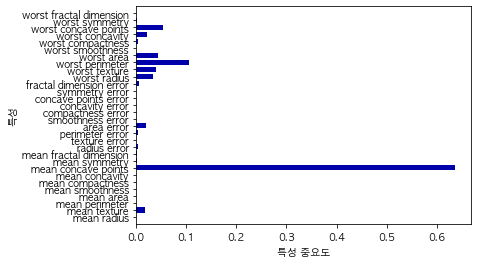

In [9]:
#plot으로 찍어보기
def plot_feature_importances_cancer(model):
    n_feature = cancer.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, align="center") #가로 막대그래프를 그리는 함수
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_feature)
    
plot_feature_importances_cancer(gbrt)

In [10]:
# 앙상블 모델 실습

In [11]:
# 데이터 준비
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [12]:
X,y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# voting class
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [14]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf', rnd_clf),('dt',dt_clf)], voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))])

In [15]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [16]:
from sklearn.ensemble import BaggingClassifier
#obb_score를 True로 해주면, 자동으로 oob평가를 수행해줌

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, oob_score=True, random_state =40)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  oob_score=True, random_state=40)

In [17]:
#oob score 출력
print("oob_score: ", bag_clf.oob_score_)

oob_score:  0.8986666666666666


In [18]:
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.912


In [19]:
# XGboost
import xgboost

In [20]:
xgb_clf = xgboost.XGBClassifier(n_estimators=100, max_depth=3, random_state=42, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.872

In [21]:
#support vecotr machine

In [22]:
X, y = make_blobs(centers=4, random_state=8)

In [23]:
print(y)

[3 2 1 3 3 0 2 1 3 3 0 0 3 1 1 2 2 3 3 0 0 1 0 0 3 0 0 3 2 1 1 3 1 3 0 2 3
 0 1 2 1 3 2 2 0 2 1 0 1 1 1 2 0 0 3 2 2 2 0 3 3 2 1 2 0 1 3 1 0 0 1 2 0 1
 0 0 3 2 3 1 2 0 3 2 3 2 0 2 2 3 1 0 3 2 2 1 1 3 1 1]


In [24]:
y = y % 2 #클래스 레이블을 만드는 트릭
print(y)

[1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1]


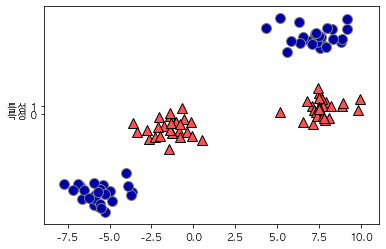

In [25]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.plot("특성 0")
plt.plot("특성 1")

/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

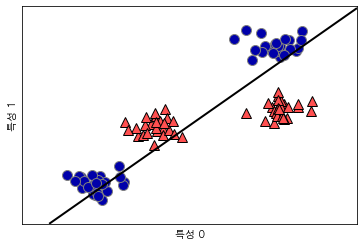

In [26]:
# lineaer svm 적용
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [27]:
# 특성을 추가해섯, 3차원에 svm적용
from mpl_toolkits.mplot3d import Axes3D, axes3d

Text(0.5, 0, '특성 1 ** 2')

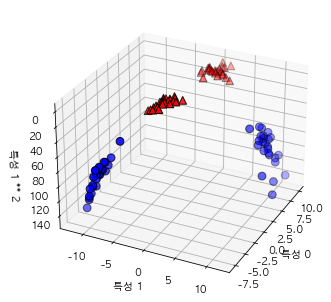

In [28]:
X_new = np.hstack([X,X[:,1:]**2])
figure =plt.figure()
# 3차원 그래프
ax = Axes3D(figure,elev=-152,azim=-26)
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2], c='b', cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2], c='r',marker='^' ,cmap=mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")

/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in power
  del sys.path[0]
/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  from ipykernel import kernelapp as app


Text(0.5, 0, '특성 1 ** 2')

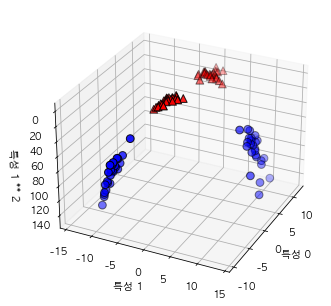

In [29]:
#결정경계가 오류로 인해서 안그려짐

linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure =plt.figure()
ax = Axes3D(figure,elev=-152,azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1]**YY + intercept)/-coef[2]

ax.plot_surface(XX,YY,ZZ, rstride =8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2], c='b', cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2], c='r',marker='^' ,cmap=mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")


Text(0.5, 0, '특성 1')

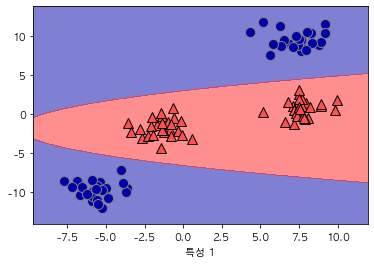

In [30]:
ZZ = YY **2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY, dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()], cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.xlabel("특성 1")

In [31]:
#cancer data에 적용 (svc, linearsvc)
from sklearn.svm import SVC

In [32]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state =0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


Text(0, 0.5, '특성 크기')

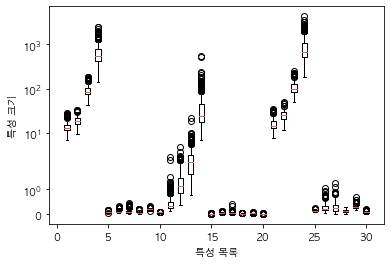

In [33]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [34]:
min_on_training = X_train.min(axis=0)
range_on_training =(X_train-min_on_training).max(axis=0)
X_train_scaled = (X_train-min_on_training)/range_on_training
X_test_scaled =(X_test- min_on_training)/range_on_training

In [35]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("훈련 세트 정확도: {:.3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.984
훈련 세트 정확도: 0.972


In [36]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("훈련 세트 정확도: {:.3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도: 1.000
훈련 세트 정확도: 0.958


In [37]:
#linearSVC계산
linear_svm = LinearSVC().fit(X_train_scaled, y_train)
print("훈련 세트 정확도: {:.3f}".format(linear_svm.score(X_train_scaled,y_train)))
print("훈련 세트 정확도: {:.3f}".format(linear_svm.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.984
훈련 세트 정확도: 0.965


In [38]:
#iris data(svm, linearsvm)
from sklearn.metrics import confusion_matrix
from sklearn import datasets

In [39]:
#svm
iris_dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0)
svc = SVC()

min_on_training = X_train.min(axis=0)
range_on_training =(X_train-min_on_training).max(axis=0)
X_train_scaled = (X_train-min_on_training)/range_on_training
X_test_scaled =(X_test- min_on_training)/range_on_training


svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n테스트 세트의 정확도: {:.2f}".format(svc.score(X_test_scaled, y_test)))
print("Number of mislabeled points out of a total %d points : %d" %(X_test.shape[0], (y_test != y_pred).sum()))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

테스트 세트의 정확도: 0.97
Number of mislabeled points out of a total 38 points : 1


In [40]:
# Linearsvm
iris_dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0)
svc = LinearSVC()

min_on_training = X_train.min(axis=0)
range_on_training =(X_train-min_on_training).max(axis=0)
X_train_scaled = (X_train-min_on_training)/range_on_training
X_test_scaled =(X_test- min_on_training)/range_on_training


svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n테스트 세트의 정확도: {:.2f}".format(svc.score(X_test_scaled, y_test)))
print("Number of mislabeled points out of a total %d points : %d" %(X_test.shape[0], (y_test != y_pred).sum()))

[[13  0  0]
 [ 0 11  5]
 [ 0  1  8]]

테스트 세트의 정확도: 0.84
Number of mislabeled points out of a total 38 points : 6


In [41]:
#MLP cancer data application
from sklearn.neural_network import MLPClassifier

In [42]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state =0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [43]:
#z-score 표준화
#평균계산
mean_on_train = X_train.mean(axis=0)
#표준 편차
std_on_train =X_train.std(axis=0)

In [44]:
X_train_scaled =(X_train - mean_on_train)/std_on_train
X_test_scaled =(X_test -mean_on_train)/std_on_train

In [45]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.97


/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [46]:
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.97


In [47]:
mlp = MLPClassifier(max_iter=1000, alpha=1 ,random_state=42)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.98
